# LetsGrowMoreVIP - Data Science Internship (April '22)

## Beginner Level Task 1:Iris Flowers Classification ML Project 

### Importing all Required Libraries

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import  scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

### Reading the iris dataset

In [87]:
df = pd.read_csv("iris.data", header=None) #dataset is stored in same folder as the notebook file.

In [88]:
df.head() #printing first five rows of the dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.tail() #printing last five rows of the dataset

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [90]:
df.columns 

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [91]:
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'] #renaming the column names 
df.columns = columns
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the dataset

In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum() #Checking for Missing/Null Values

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [12]:
df.groupby('Species').size() #checking size of each species

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [13]:
df.nunique()

SepalLength    35
SepalWidth     23
PetalLength    43
PetalWidth     22
Species         3
dtype: int64

### Data Visualization

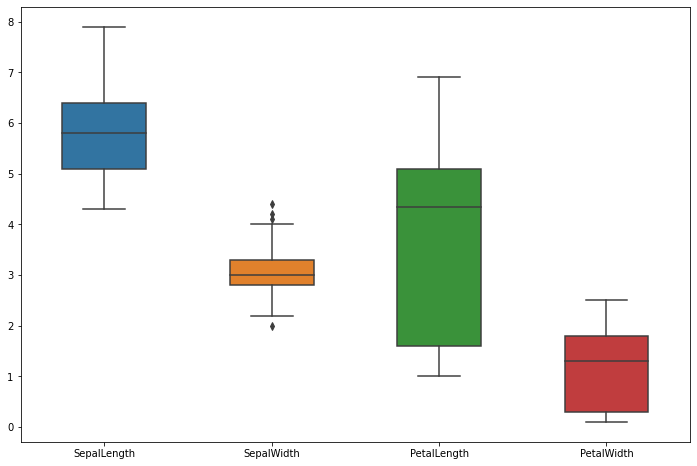

In [14]:
#Checking Outliers
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, width = 0.5, fliersize = 5)
plt.show()

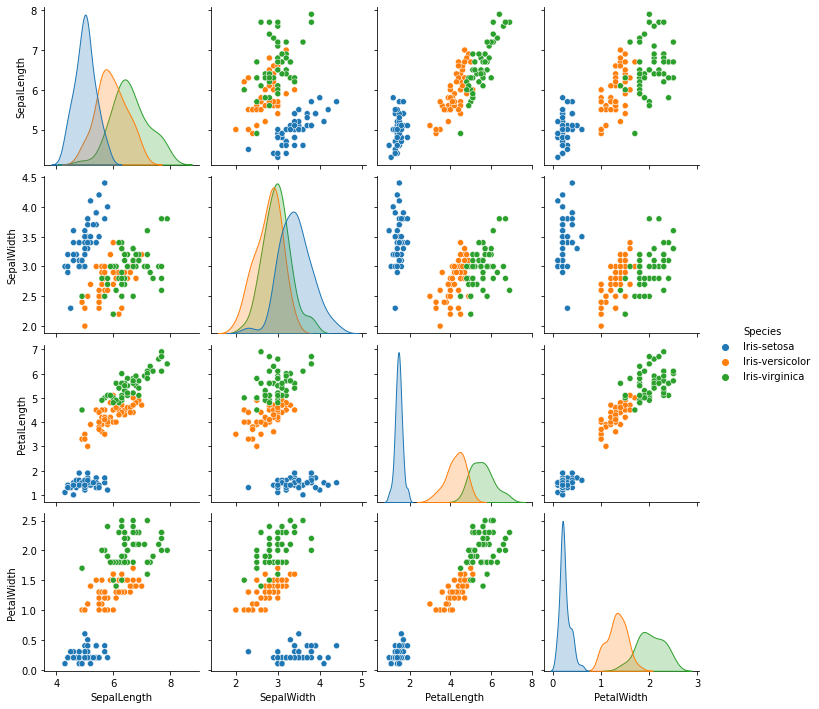

In [125]:
sns.pairplot(data = df, hue='Species') #pair-plot of the data
plt.show()

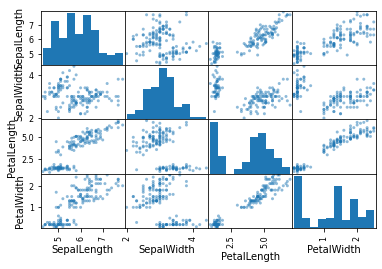

In [117]:
scatter_matrix(df) #another data plotting
plt.show()

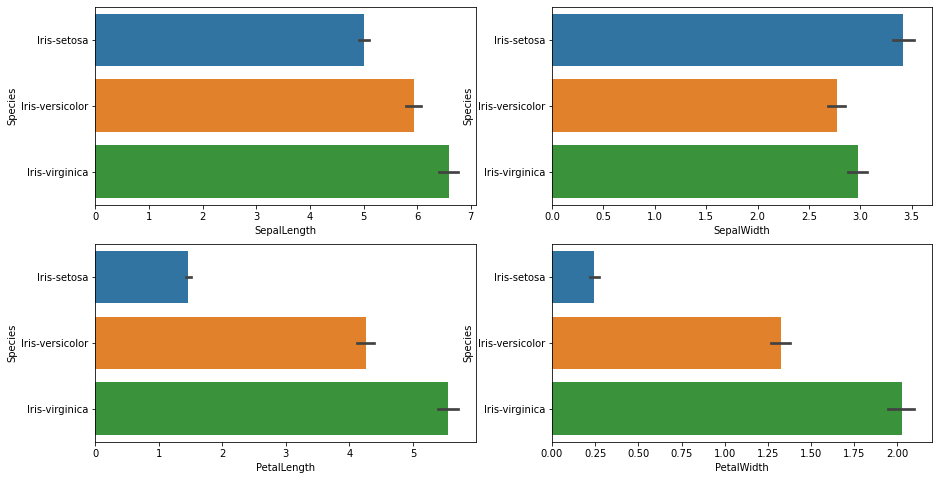

In [137]:
#Comparing the features of each species using Bar Plot
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x = 'SepalLength', y = 'Species', data = df)
plt.subplot(2,2,2)
sns.barplot(x = 'SepalWidth', y = 'Species', data = df)
plt.subplot(2,2,3)
sns.barplot(x = 'PetalLength', y = 'Species', data = df)
plt.subplot(2,2,4)
sns.barplot(x = 'PetalWidth', y = 'Species', data = df)

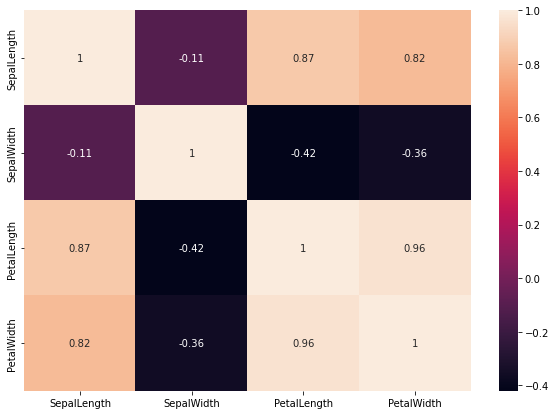

In [115]:
# Plot of Correlation in a Heatmap
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [138]:
#Defining the Independent and Dependent Variables
X = df.drop(columns="Species") # Independent variable
y = df["Species"] # Dependent variable

In [155]:
#Spliting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Building ML Models

In [156]:
#Random Forest Classifier Algorithm
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)  

In [157]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  
print('Accuracy using Random Forest Classifier Algorithm:',accuracy_score(y_test, y_pred))

Accuracy using Random Forest Classifier Algorithm: 0.9736842105263158


In [161]:
#Logistic Regression
classifier= LogisticRegression()
classifier.fit(X_train, y_train)
pred= classifier.predict(X_test)
print('Accuracy using Logistic Regression Algorithm:',accuracy_score(pred,y_test))

Accuracy using Logistic Regression Algorithm: 0.9736842105263158


In [164]:
#Support Vector Machine 
model= SVC()
model.fit(X_train,y_train)
predd = model.predict(X_test)
print('Accuracy using Support Vector Machine Algorithm:',accuracy_score(y_test,predd))

Accuracy using Support Vector Machine Algorithm: 0.9736842105263158


### Conclusion

#### We can conclude that using Random Forest Model,Logistic Regression & SVM on the IRIS Flower Dataset, we can achieve an approximate accuracy of 97%

####  Done by Soumyadip Tikader